# Соколов Александр, лабораторная работа 2, вариант 22

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Задача 2.5.4
Найти приближенно корень уравнения $f(x)=0$, принадлежащий отрезку $[a,b]$, с точностью $ε = 10^{−5}$ , используя модификацию метода Ньютона для случая кратного корня при значениях $m=1,2,3,4,5$. По числу итераций определить кратность корня.
$F(x)=ctgx + 2x + π * x − 1 − π / 2 - 2 * x^2 − π^2 / 8$
[a,b]=[0,1]

In [6]:
def f(x):
    return 1 / np.tan(x) + 2 * x + np.pi * x  - 1 - np.pi / 2 - 2 * x**2 - np.pi**2 / 8 
a, b = 0, 1

/Users/strizh78/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


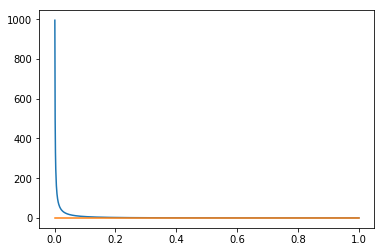

In [8]:
x = np.linspace(a, b, 1000)
plt.plot(x, f(x))
plt.plot(x, np.zeros_like(x));

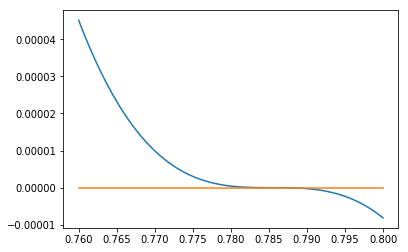

In [12]:
x = np.linspace(0.76, 0.8, 1000)
plt.plot(x, f(x))
plt.plot(x, np.zeros_like(x));

In [16]:
## реализуем метод Ньютона
def der_f(x):
    return - 1 / np.sin(x)**2 + 2 + np.pi - 4 * x

def NewtonMethodModified(f, der_f, x0, m, eps):
    x = x0
    steps = 0
    while abs(m * f(x) / der_f(x)) > eps:
        steps += 1
        x = x - m * f(x) / der_f(x)
    return x, steps
for m in range(1, 6):
    print ('m = ', m)
    ans, st = NewtonMethodModified (f, der_f, (a + b) / 2., m, 1e-5)
    print ('Root = ', ans, '\nRequired number of steps = ', st)

m =  1
Root =  0.7853769078276263 
Required number of steps =  24
m =  2
Root =  0.7853905590458302 
Required number of steps =  10
m =  3
Root =  0.7853978340947593 
Required number of steps =  3
m =  4
Root =  0.7854051637860887 
Required number of steps =  15
m =  5
Root =  0.7853927460353878 
Required number of steps =  31


При m = 3 получаем минимальное число итераций (оно сильно меньше, чем при других m) --> кратность корня = 3

# Задача 2.10.3
Функция $y=f(x)$ задана неявно уравнением $F(x,y)=0$. На отрезке $[1, 5]$ построить таблицу значений функции $y=f(x)$ с шагом $h=0.5$, применяя один из методов численного решения нелинейного уравнения (с точностью $ε = 10^{−7}$). Построить график функции $y=f(x)$ на заданном отрезке.

$e^{xy}−cos(xy^3)=0$

$0.5 ≤ x ≤ 1.5$
$−1.3 ≤ y ≤ −0.3$

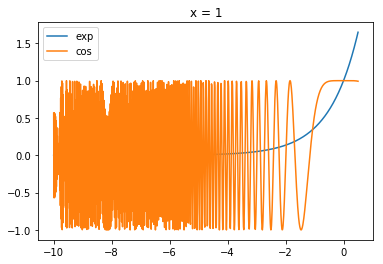

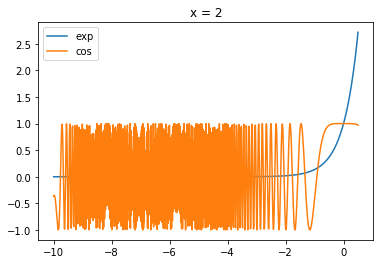

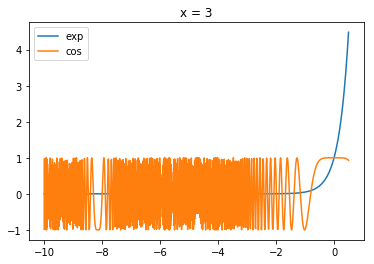

In [21]:
for x in range(1, 4):
    plt.figure()
    y = np.linspace(-10, 0.5, 1000)
    plt.plot(y, np.exp(x * y), label = 'exp')
    plt.plot(y, np.cos(x * y**3), label = 'cos')
    plt.title('x = ' + str(x))
    plt.legend()
#     plt.show()

In [31]:
def f(x, y):
    return np.exp(x * y) - np.cos(x * y**3)

def BisectionSolveFor2VarFunc(f, x, l, r, eps):
    """ Принимает f(x, y), значение x, границы отрезка локализации и требуемую точность, 
    находит на отрезке корень уравнения f(x, y) = 0 методом бисекции (для фиксированного x находим решение для y),
    Возвращает найденный корень"""
    if f(x, l) * f(x, r) > 0:
        return np.NAN
    while l + eps < r:
        m = (l + r) / 2.
        if f(x, m) * f(x, r) < 0:
            l = m
        else:
            r = m
    return l

In [37]:
table = {}
for x in np.arange(1, 5.5, 0.5):
    l = -1e-15 
    r = l
    while f(x, r) <= 0:
        r -= 0.001
    y = BisectionSolveFor2VarFunc(f, x, r, l, 1e-7)  
    table[x] = y
table

{1.0: -1.0685758972167911,
 1.5: -0.9611857193708437,
 2.0: -0.8880475311875361,
 2.5: -0.8331696395874039,
 3.0: -0.7896365773677841,
 3.5: -0.7538231985569016,
 4.0: -0.7235896077156082,
 4.5: -0.6975666522979751,
 5.0: -0.6748254686594025}

In [41]:
X = np.linspace(0.5, 1.5, 1000)
f_x = []
for x in X:
    l = -1e-15
    while f(x, r) <= 0:
        r -= 0.001
    f_x.append(BisectionSolveFor2VarFunc(f, x, r, l, 1e-7))   

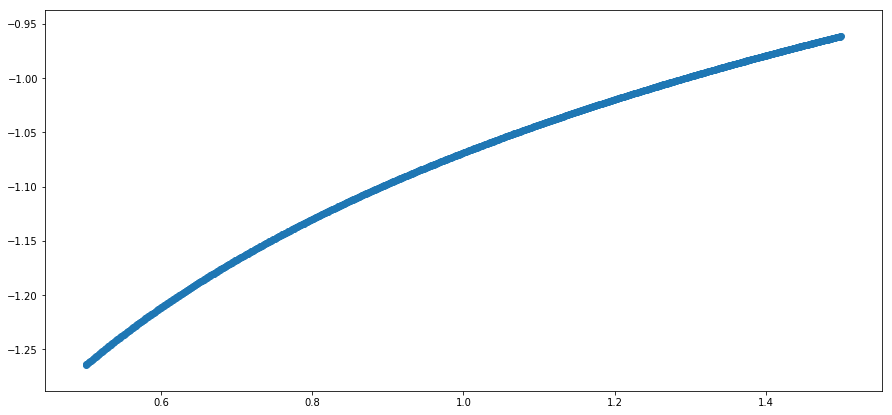

In [42]:
plt.figure(figsize = (15, 7))
plt.scatter(X, f_x)
plt.show()

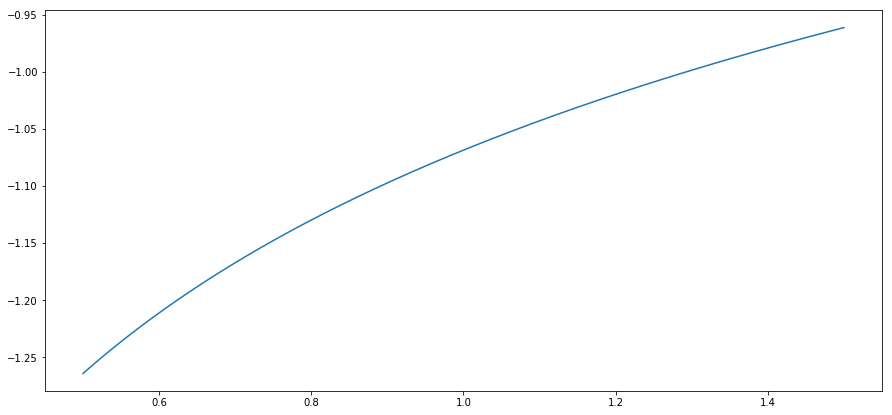

In [43]:
plt.figure(figsize = (15, 7))
plt.plot(X, f_x)
plt.show()